In [29]:
%%time
# Imports:

# defaults
import math
import numpy as np
import matplotlib.pyplot as plt
import csv

# torch stuff
import torch
import torch.nn as nn
from torch.optim import Adam, NAdam
from torch.utils.data import TensorDataset, DataLoader

# UNet dependencies
from denoising_diffusion_pytorch import Unet1D # fancy unet
# from functools import partial
# from einops import rearrange, reduce
# from einops.layers.torch import Rearrange

# Smact check dependencies
import smact
from smact.screening import pauling_test
import pandas
import itertools
from fractions import Fraction
import functools
from pymatgen.core.composition import Composition

# Typenotes
from typing import Tuple
from typing import List

# file import
from helper_formula_parse import *
from supercon_wtypes_parse import *
from helper_dataset_shuffle import *
from dataset_creation import *
from helper_reverse_formula import *
# from helper_unet_functions import *
from smact_validity_checks import *
from save_valid_compounds_to_csv import *

CPU times: total: 0 ns
Wall time: 0 ns


In [30]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image

In [31]:
element_table = ["H","He","Li","Be","B","C","N","O","F","Ne","Na","Mg","Al","Si","P","S","Cl","Ar","K","Ca","Sc","Ti","V","Cr","Mn","Fe","Co",
              "Ni","Cu","Zn","Ga","Ge","As","Se","Br","Kr","Rb","Sr","Y","Zr","Nb","Mo","Tc","Ru","Rh","Pd","Ag","Cd","In","Sn","Sb","Te",
              "I","Xe","Cs","Ba","La","Ce","Pr","Nd","Pm","Sm","Eu","Gd","Tb","Dy","Ho","Er","Tm","Yb","Lu","Hf","Ta","W","Re","Os","Ir",
              "Pt","Au","Hg","Tl","Pb","Bi","Po","At","Rn","Fr","Ra","Ac","Th","Pa","U","Np","Pu","Am","Cm"]

In [32]:
x0 = torch.zeros(96)
print(x0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [33]:
# Y1Ba2Cu3O4.86

In [64]:
nickelate_set = ["Nd0.8Sr0.2Ni1O2"]
nickelate_set_1 = split_sc_to_vector(merge_sc_char(split_scform_to_char(nickelate_set[0])), element_table)
# nickelate_set_2 = split_sc_to_vector(merge_sc_char(split_scform_to_char(nickelate_set[1])), element_table)
nickelate_set_1 = torch.from_numpy(nickelate_set_1)
x0 = nickelate_set_1

In [74]:
nickelate_set = ["O2.02Co0.48Ni0.44Sr0.21Nd0.84"]
nickelate_set_1 = split_sc_to_vector(merge_sc_char(split_scform_to_char(nickelate_set[0])), element_table)
# nickelate_set_2 = split_sc_to_vector(merge_sc_char(split_scform_to_char(nickelate_set[1])), element_table)
nickelate_set_1 = torch.from_numpy(nickelate_set_1)
x0 = nickelate_set_1

In [129]:
nickelate_set = ["Y1.0Ba1.4Sr0.6Cu3O6Se0.51"]
nickelate_set_1 = split_sc_to_vector(merge_sc_char(split_scform_to_char(nickelate_set[0])), element_table)
# nickelate_set_2 = split_sc_to_vector(merge_sc_char(split_scform_to_char(nickelate_set[1])), element_table)
nickelate_set_1 = torch.from_numpy(nickelate_set_1)
x0 = nickelate_set_1

In [130]:
print(x0)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 6.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 3.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5100, 0.0000, 0.0000,
        0.0000, 0.6000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 1.4000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000], dtype=torch.float64)


In [131]:
chemForm = cform_from_vector(x0, element_table)
print(chemForm)

O6.0Cu3.0Se0.51Sr0.6Y1.0Ba1.4


In [132]:
x0trial = x0.unsqueeze(0)

In [133]:
# Hg1Ba2Ca2Cu3O8.27
# Hg1.0Ba2.0Ca2.0Cu3.0O8.27

In [124]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"NOTE: Using Device: \"{device}\"","|",(f"{torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "CPU"))

NOTE: Using Device: "cuda:0" | NVIDIA GeForce RTX 3060 Ti


In [41]:
def get_named_beta_schedule(schedule_name: str, num_diffusion_timesteps: int) -> torch.Tensor:
    """
    Get a pre-defined beta schedule for the given name.

    :param schedule_name: The name of the beta schedule.
    :param num_diffusion_timesteps: The number of diffusion timesteps.
    :return: The beta schedule tensor.
    :rtype: torch.Tensor[torch.float64]
    """
    if schedule_name == "linear":
        # Linear schedule from Ho et al, extended to work for any number of diffusion steps.
        scale = 1000 / num_diffusion_timesteps
        beta_start = scale * 0.0001
        beta_end = scale * 0.02
        return torch.linspace(
            beta_start, beta_end, num_diffusion_timesteps
        ).to(torch.float64)
    elif schedule_name == "cosine":
        return betas_for_alpha_bar(
            num_diffusion_timesteps,
            lambda t: math.cos((t + 0.008) / 1.008 * math.pi / 2) ** 2,
        )
    else:
        raise NotImplementedError(f"unknown beta schedule: {schedule_name}")


In [42]:
def betas_for_alpha_bar(num_diffusion_timesteps: int, alpha_bar: float, max_beta=0.999) -> torch.Tensor:
    """
    Create a beta schedule that discretizes the given alpha_t_bar function,
    which defines the cumprod of (1-beta) over time from t = [0,1].

    :param num_diffusion_timesteps: The number of betas to produce.
    :param alpha_bar: A lambda that takes an argument t from 0 to 1 and produces
                      the cumulative product of (1-beta) up to that part of the
                      diffusion process.
    :param max_beta: The maximum beta to use; use values lower than 1 to prevent
                     singularities (Improved Diffusion Paper).
    :return: The beta schedule tensor.
    :rtype: torch.Tensor[torch.float64]
    """
    betas = []
    for i in range(num_diffusion_timesteps):
        t1 = i / num_diffusion_timesteps
        t2 = (i + 1) / num_diffusion_timesteps
        betas.append(min(1 - alpha_bar(t2) / alpha_bar(t1), max_beta))
    return torch.Tensor(betas).to(torch.float64)

In [43]:
class GaussianDiffusion1D:
    """
    Class for Gaussian diffusion of 1D Tensors (vector diffusion).
    """

    def __init__(
        self,
        sequence_length: int,
        timesteps: int,
        beta_schedule_type: str
    ):
        """
        Initializes the GaussianDiffusion1D class.

        :param sequence_length: Length of the sequence.
        :param timesteps: Number of timesteps.
        :param beta_schedule_type: Type of beta schedule. Can be "linear" or "cosine".

        :raises TypeError: If the beta schedule type is unknown.
        """
        self.sequence_length = sequence_length
        self.timesteps = timesteps
        self.beta_schedule_type = beta_schedule_type

        if self.beta_schedule_type == "linear":
            self.betas = get_named_beta_schedule(self.beta_schedule_type, self.timesteps)
        elif self.beta_schedule_type == "cosine":
            self.betas = get_named_beta_schedule(self.beta_schedule_type, self.timesteps)
        else:
            raise TypeError(f"{self.beta_schedule_type} is an unknown beta schedule type.")

        self.alphas = 1 - self.betas
        self.alphas_bar = torch.cumprod(self.alphas, axis=0)

    def forward(
        self,
        x_0: torch.Tensor,
        t: torch.Tensor,
        device: str
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Forward diffusion process. Adding noise ~ N(0, I) to vectors.

        :param x_0: Original vector of shape (B, C, L).
        :param t: Timestep tensor of shape (B,).
        :param device: Device to be used.

        :return: Tuple containing mean tensor and noise tensor.
        """
        epsilon = torch.randn_like(x_0)
        alphas_bar_t = self.extract(self.alphas_bar, t, x_0.shape)

        mean = torch.sqrt(alphas_bar_t).to(device) * x_0.to(device)
        variance = torch.sqrt((1 - alphas_bar_t)).to(device) * epsilon.to(device)

        return mean + variance, epsilon.to(device)

    @torch.no_grad()
    def backward(
        self,
        x_t: torch.Tensor,
        t: torch.Tensor,
        model: nn.Module,
        **kwargs
    ) -> torch.Tensor:
        """
        Calls the model to predict the noise in the image and returns
        the denoised image (x_{t-1}).

        This method corresponds to the "big for loop" in the sampling algorithm (see algorithm 2 from Ho et al.).

        :param x_t: Current image tensor of shape (B, C, L).
        :param t: Timestep tensor of shape (B,).
        :param model: Model used to predict the noise in the image.
        :param **kwargs: Additional arguments to be passed to the model.

        :return: Denoised image tensor of shape (B, C, L).
        """
        betas_t = self.extract(self.betas, t, x_t.shape)
        sqrt_one_minus_alphas_bar_t = self.extract(torch.sqrt(1. - self.alphas_bar), t, x_t.shape)
        sqrt_recip_alphas_t = self.extract(torch.sqrt(1.0 / self.alphas), t, x_t.shape)
        mean = sqrt_recip_alphas_t * (x_t - ((betas_t / sqrt_one_minus_alphas_bar_t) * model(x_t, t, **kwargs)))
        posterior_variance_t = betas_t

        # Applies noise to this image if we are not in the last step yet.
        if t == 0:
            return mean
        else:
            z = torch.randn_like(x_t)
            variance = torch.sqrt(posterior_variance_t) * z
            return mean + variance

    @staticmethod
    def extract(
        values: torch.Tensor,
        t: torch.Tensor,
        x_0_shape: Tuple[int]
    ) -> torch.Tensor:
        """
        Picks the values from `values` according to the indices stored in `t`.

        :param values: Tensor of values to pick from.
        :param t: Index tensor.
        :param x_0_shape: Shape of the original tensor x_0.

        :return: Reshaped tensor with picked values.
        """
        batch_size = t.shape[0]
        vector_to_reshape = values.gather(-1, t.cpu())
        """
        if len(x_shape) - 1 = 2:
        reshape `out` to dims
        (batch_size, 1, 1)
        """
        return vector_to_reshape.reshape(batch_size, *((1,) * (len(x_0_shape) - 1))).to(t.device)


In [44]:
DIFFUSION_TIMESTEPS = 1000
diffusion_model = GaussianDiffusion1D(96, DIFFUSION_TIMESTEPS, "cosine")

In [15]:
t = torch.randint(0, diffusion_model.timesteps, (1,)).long().to(device)

In [16]:
print(t)

tensor([887], device='cuda:0')


In [22]:
bigt = torch.tensor([999]).to(device)

In [23]:
print(bigt)

tensor([999], device='cuda:0')


In [25]:
xbigt, gt_noise_train = diffusion_model.forward(x0trial, bigt, device)

In [63]:
print(xbigt)

tensor([[ 1.4125,  0.4254, -0.3321, -0.4543, -1.0107, -0.7462, -0.5909, -0.5542,
         -0.9048,  0.2819,  0.8972,  0.9246,  0.1902, -0.6822, -1.5335,  0.1671,
          0.1477, -0.4120,  0.2089,  1.5446, -0.0437,  0.2548,  0.4323, -0.4198,
         -2.6162,  0.0436, -0.4447, -0.9457,  1.2047,  0.0433,  0.0663,  1.8495,
         -1.2361, -1.9972,  1.0014, -0.0628, -0.2693, -0.7334,  0.1604, -0.4740,
          0.1255, -0.0597, -0.2210,  1.5915, -1.7344, -0.3172, -0.3839, -0.1158,
         -1.1414, -1.0295, -0.3648, -3.1781,  0.8321,  0.1174, -0.5670,  1.7403,
         -0.4128,  0.3326,  0.8709,  0.0912,  0.1017,  0.8176, -1.2865, -1.7935,
         -3.2112,  0.8574,  0.1624,  2.1155, -0.5467, -0.2454,  1.1206, -0.4124,
          0.4416, -1.2076, -1.6670,  0.1184, -0.4133, -0.6520, -1.3195,  0.4920,
          0.6739,  0.1381,  1.5237, -1.9199, -1.9935, -1.8925, -0.5086, -1.4834,
          0.8196, -0.8857, -0.0174, -1.8875,  1.3567,  2.6433, -0.6231,  0.6881]],
       device='cuda:0', dt

In [72]:
SUPERCON_DATA_FILE = "SuperCon_with_types.dat"

# element table to set up vectors in R^(1x96): must len(element_table) = 96
element_table = ["H","He","Li","Be","B","C","N","O","F","Ne","Na","Mg","Al","Si","P","S","Cl","Ar","K","Ca","Sc","Ti","V","Cr","Mn","Fe","Co",
              "Ni","Cu","Zn","Ga","Ge","As","Se","Br","Kr","Rb","Sr","Y","Zr","Nb","Mo","Tc","Ru","Rh","Pd","Ag","Cd","In","Sn","Sb","Te",
              "I","Xe","Cs","Ba","La","Ce","Pr","Nd","Pm","Sm","Eu","Gd","Tb","Dy","Ho","Er","Tm","Yb","Lu","Hf","Ta","W","Re","Os","Ir",
              "Pt","Au","Hg","Tl","Pb","Bi","Po","At","Rn","Fr","Ra","Ac","Th","Pa","U","Np","Pu","Am","Cm"]

# validate table correctness
validation_element_table = ["H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K", "Ca",
                            "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr", "Rb", "Sr","Y",
                            "Zr","Nb","Mo","Tc","Ru","Rh","Pd","Ag","Cd","In","Sn","Sb","Te","I","Xe","Cs","Ba","La","Ce","Pr","Nd","Pm",
                            "Sm","Eu","Gd","Tb","Dy","Ho","Er","Tm","Yb","Lu","Hf","Ta","W","Re","Os","Ir","Pt","Au","Hg","Tl","Pb" ,"Bi" ,
                            "Po" ,"At" ,"Rn" ,"Fr" ,"Ra" ,"Ac" ,"Th" ,"Pa" ,"U" ,"Np" ,"Pu" ,"Am" ,"Cm"]

assert(len(element_table) == 96)
print("NOTE: Correct element table length.")

assert(validation_element_table == element_table)
print("NOTE: Valid table.")

NOTE: Correct element table length.
NOTE: Valid table.


In [79]:
torch_diffusion_data_raw_unconditional_train, *disregard_other_values = prepare_datasets_for_classes(SUPERCON_DATA_FILE, element_table, 0, return_test_sets = False)

torch.Size([16708, 96])
torch.Size([7589, 96])
torch.Size([1440, 96])
torch.Size([7679, 96])
Train Data Size: 16708 | Test Data Size: 0
Train Data Size: 7589 | Test Data Size: 0
Train Data Size: 1440 | Test Data Size: 0
Train Data Size: 7679 | Test Data Size: 0


In [82]:
bigt = torch.tensor([999]).to(device)
listofvalues = []
for i in range(torch_diffusion_data_raw_unconditional_train.size(0)):
    xbigt, _ = diffusion_model.forward(torch_diffusion_data_raw_unconditional_train[i].unsqueeze(0), bigt, device)
    listofvalues.extend(xbigt.squeeze().tolist())

In [83]:
print(len(listofvalues))

1603968


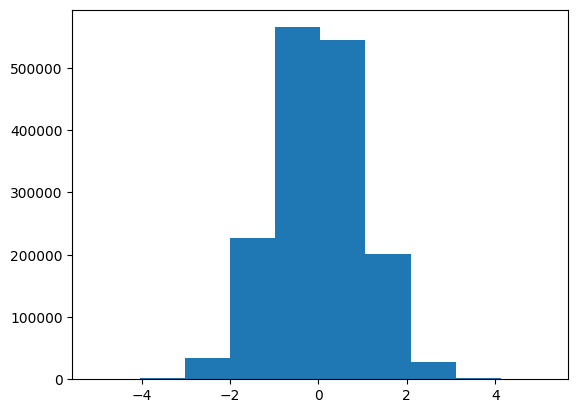

In [84]:
plt.hist(listofvalues)
plt.show()

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

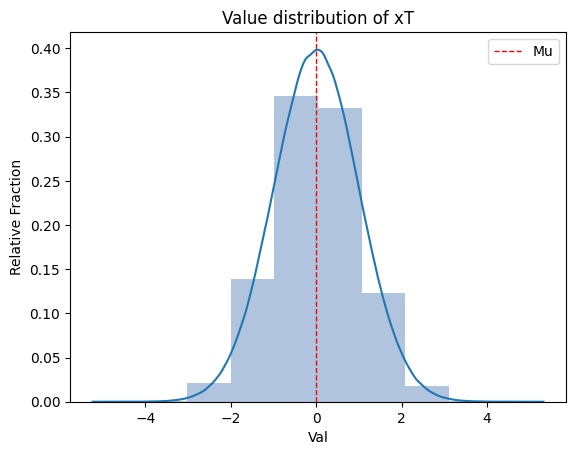

Mu: 0.0004909436425543296
Sigma: 1.0001369570007244


In [88]:
mu, sigma = norm.fit(listofvalues)
plt.axvline(x=mu, color='red', linestyle='--', linewidth=1)

plt.hist(listofvalues, color = "lightsteelblue", density = True, bins = 10)

sns.kdeplot(data=listofvalues)

plt.xlabel('Val')
plt.ylabel('Relative Fraction')
plt.legend(["Mu"])

plt.title('Value distribution of xT')
plt.show()
print(f"Mu: {mu}")
print(f"Sigma: {sigma}")

In [27]:
intermediatet = torch.tensor([667]).to(device)

In [28]:
xintermediatet, _ = diffusion_model.forward(x0trial, intermediatet, device)

In [29]:
print(xintermediatet)

tensor([[ 0.2295,  0.4921, -0.2467,  0.8403, -0.2483, -0.0892,  0.8169,  3.2732,
          0.3203,  0.5313, -1.0475,  0.9442,  0.3373,  0.7589,  0.2496, -0.4357,
         -1.1500, -0.5599, -1.2658,  0.3017,  0.6887,  0.3635, -1.2610, -0.4737,
         -0.7485,  0.4118,  0.3776,  0.7846,  1.5407, -0.0846,  0.3919, -0.0435,
         -0.9161, -0.9294, -2.6210,  0.0368, -1.2990, -0.5140, -1.3533, -0.1526,
          0.3379,  0.0360,  0.0592, -1.2289,  1.1570,  0.1345, -1.1576, -1.4543,
          0.4806,  0.2530, -0.4849,  0.4806,  0.1378,  1.9299,  0.5262,  1.9898,
         -0.3968, -1.2877, -0.3406,  1.5868,  0.3089, -0.9812,  0.4169, -0.3721,
         -1.3155, -0.5441,  0.2532, -0.1863,  1.5306,  0.2089, -1.0084, -0.5130,
         -1.9322, -1.6606, -0.2535, -0.4224, -0.3537, -1.3085,  0.5764, -0.3640,
         -0.5732, -0.4380, -0.1553,  0.1659,  0.2068,  1.9610, -0.8771,  1.7238,
         -0.7496,  0.8512,  0.0420,  0.3814, -0.7365, -1.3661,  0.6905,  0.9735]],
       device='cuda:0', dt

In [30]:
smallert = torch.tensor([100]).to(device)

In [31]:
xsmallert, _ = diffusion_model.forward(x0trial, smallert, device)

In [32]:
print(xsmallert)

tensor([[-1.3279e-01,  1.8236e-01,  8.2270e-02,  2.9892e-04,  1.4131e-01,
         -3.5992e-01,  2.0062e-01,  8.3585e+00,  1.0469e-01, -6.2408e-02,
         -1.4812e-01, -4.8766e-01, -4.0189e-02, -1.6088e-02,  1.1834e-01,
         -6.7225e-02, -1.4996e-01, -1.1107e-01, -1.2302e-01,  2.3464e+00,
          1.1767e-02, -3.1509e-01,  1.3069e-01,  2.5646e-01,  2.3721e-01,
          6.9618e-02,  1.2659e-02, -2.7672e-01,  3.0216e+00, -1.0819e-01,
          1.8801e-01, -3.1065e-01, -1.5964e-01, -2.4209e-01, -1.6938e-01,
         -1.1964e-01, -6.5436e-02, -1.6431e-01,  1.2185e-01,  2.6937e-01,
          1.3071e-01, -7.3152e-02,  9.2303e-02, -1.2641e-01, -7.4230e-02,
         -7.1363e-02, -6.4017e-02, -1.7602e-02, -1.5116e-01,  7.9638e-02,
         -3.3608e-01,  1.1344e-01,  2.4771e-01, -4.2192e-03, -1.1012e-01,
          1.6879e+00, -3.2112e-01,  9.7580e-02, -1.5230e-01,  7.7595e-02,
          1.7634e-02,  1.3514e-01, -1.1500e-01,  4.0661e-01, -7.9299e-02,
          2.3037e-01, -5.6328e-02,  3.

In [51]:
def process_tensor_for_image(x0, upscale_factor = 20):
    x0 = torch.round(x0, decimals = 2)
    mask = x0 > 0
    positive_x0 = torch.zeros_like(x0)
    positive_x0[mask] = x0[mask]
    x0 = torch.abs(x0)
    
    x0_resized = torch.reshape(x0, (16, 6))
    positive_x0_resized = torch.reshape(positive_x0, (16, 6))
    
    # upscale_factor = 20 # is a
    
    # 1 x 1 -> a x a
    x0_upscaled = x0_resized.repeat_interleave(upscale_factor, dim=0).repeat_interleave(upscale_factor, dim=1)
    positive_x0_upscaled = positive_x0_resized.repeat_interleave(upscale_factor, dim=0).repeat_interleave(upscale_factor, dim=1)
    
    x0_R = x0_upscaled
    x0_G = positive_x0_upscaled
    x0_B = positive_x0_upscaled
    
    image_tensor = torch.stack((x0_R, x0_G, x0_B), dim=0)
    
    return image_tensor

In [52]:
xsmallert_image = process_tensor_for_image(xsmallert)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 xsmallert_image = process_tensor_for_image(xsmallert)                                        │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'xsmallert' is not defined

In [53]:
def PIL_image_creation(image_tensor):
    transform = T.ToPILImage()
    x0newimage = transform(image_tensor)
    return x0newimage

In [54]:
PIL_image_creation(xsmallert_image).show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 PIL_image_creation(xsmallert_image).show()                                                   │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'xsmallert_image' is not defined

In [49]:
# T = 999, 0 = 0, t = ?, t-1 = ?
t_forimage = torch.tensor([999]).to(device)
x0_forimage, _ = diffusion_model.forward(x0trial, t_forimage, device)
PIL_image_creation(process_tensor_for_image(x0_forimage, 40)).show()
# PIL_image_creation(process_tensor_for_image(x0_forimage, 40)).save("xTimagediffv2.jpg")

In [50]:
# t = 0 original x0 image
PIL_image_creation(process_tensor_for_image(x0trial, 40)).show()

In [146]:
PIL_image_creation(process_tensor_for_image(x0trial, 40)).save("x0imagediffv2.jpg")

In [166]:
# T = 999, 0 = 0, t = ?, t-1 = ?
t_forimage = torch.tensor([200]).to(device)
x0_forimage, _ = diffusion_model.forward(x0trial, t_forimage, device)
PIL_image_creation(process_tensor_for_image(x0_forimage, 40)).show()
PIL_image_creation(process_tensor_for_image(x0_forimage, 40)).save("xlatertimagediffv2.jpg")

In [127]:
def process_tensor_for_image(x0, upscale_factor = 20):
    x0 = torch.round(x0, decimals = 2)
    mask = x0 > 0
    positive_x0 = torch.zeros_like(x0)
    positive_x0[mask] = x0[mask]
    x0 = torch.abs(x0)
    
    x0_resized = torch.reshape(x0, (16, 6))
    positive_x0_resized = torch.reshape(positive_x0, (16, 6))
    
    # upscale_factor = 20 # is a
    
    # 1 x 1 -> a x a
    x0_upscaled = x0_resized.repeat_interleave(upscale_factor, dim=0).repeat_interleave(upscale_factor, dim=1)
    positive_x0_upscaled = positive_x0_resized.repeat_interleave(upscale_factor, dim=0).repeat_interleave(upscale_factor, dim=1)
    
    x0_R = x0_upscaled
    x0_G = positive_x0_upscaled
    x0_B = positive_x0_upscaled
    
    image_tensor = torch.stack((x0_R, x0_G, x0_B), dim=0)
    image_tensor = torch.div(image_tensor, 6)
    
    return image_tensor

In [104]:
# t = 0 original x0 image
PIL_image_creation(process_tensor_for_image(x0trial, 40)).show()

In [105]:
PIL_image_creation(process_tensor_for_image(x0trial, 40)).save("x0newdiff.jpg")

In [144]:
# T = 999, 0 = 0, t = ?, t-1 = ?
t_forimage = torch.tensor([300]).to(device)
x0_forimage, _ = diffusion_model.forward(x0trial, t_forimage, device)
new_image = PIL_image_creation(process_tensor_for_image(x0_forimage, 40))
new_image.show()
new_image.save("xintilvr2.jpg")